In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    max_station = ridership[0, :].argmax()
    mean_for_max = ridership[:, max_station].mean()
    overall_mean = ridership.mean()
    return (overall_mean, mean_for_max)
    
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

In [4]:
def min_and_max_riders_per_day(ridership):
    mean_daily_ridership = ridership.mean(axis = 0)
    max_daily_ridership = mean_daily_ridership.max(axis = 0)
    min_daily_ridership = mean_daily_ridership.min(axis = 0)
    
    return (mean_daily_ridership, max_daily_ridership, min_daily_ridership)

In [5]:
print(min_and_max_riders_per_day(ridership))

(array([ 1071.2,  2814.9,  2718.8,  3239.9,  1868.2]), 3239.9000000000001, 1071.2)


In [6]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [7]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [8]:
def mean_riders_for_max_station(ridership):
    station_with_max = ridership.iloc[0].argmax()
    mean_riders = ridership[station_with_max].mean()
    mean_ridership = ridership.values.mean()
    return (mean_ridership, mean_riders)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9000000000001)

In [9]:
filename = 'E:/Hamed/Projects/Python/Data Course/Data-Analysis/Lesson 3/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    x_std = (x - x.mean()) / x.std(ddof = 0)
    y_std = (y - y.mean()) / y.std(ddof = 0)
    pearson_r = (x_std * y_std).mean()
    return pearson_r

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))

print(correlation(entries, cum_entries))

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


In [23]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    return (entries_and_exits - entries_and_exits.shift(1))

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [50]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades(grades):
    if grades >= 90:
        return 'A'
    if grades >= 80 and grades <= 89:
        return 'B'
    if grades >= 70 and grades <= 79:
        return 'C'
    if grades >= 60 and grades <= 69:
        return 'D'
    if grades <= 59:
        return 'E'

grades_df.applymap(convert_grades)

,exam1,exam2
Andre,E,E
Barry,B,D
Chris,C,E
Dan,C,E
Emilio,B,D
Fred,C,E
Greta,A,C
Humbert,D,E
Ivan,A,C
James,B,D


In [7]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,[0, 0.1, 0.2, 0.5, 0.8, 1],labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
print(convert_grades_curve(grades_df['exam1']))
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
print(grades_df.apply(convert_grades_curve))
    
def standardize(df):
    return (df - df.mean()) / df.std(ddof = 0)
    
print(grades_df.apply(standardize))

Andre      (42.999, 62.8]
Barry        (79.5, 89.4]
Chris        (69.0, 79.5]
Dan          (69.0, 79.5]
Emilio       (79.5, 89.4]
Fred         (69.0, 79.5]
Greta        (89.4, 98.0]
Humbert      (62.8, 69.0]
Ivan         (89.4, 98.0]
James        (79.5, 89.4]
Name: exam1, dtype: category
Categories (5, interval[float64]): [(42.999, 62.8] < (62.8, 69.0] < (69.0, 79.5] < (79.5, 89.4] < (89.4, 98.0]]
                  exam1           exam2
Andre    (42.999, 62.8]  (23.999, 43.8]
Barry      (79.5, 89.4]    (58.0, 68.0]
Chris      (69.0, 79.5]    (50.0, 58.0]
Dan        (69.0, 79.5]    (50.0, 58.0]
Emilio     (79.5, 89.4]    (58.0, 68.0]
Fred       (69.0, 79.5]    (50.0, 58.0]
Greta      (89.4, 98.0]    (68.0, 79.0]
Humbert    (62.8, 69.0]    (43.8, 50.0]
Ivan       (89.4, 98.0]    (68.0, 79.0]
James      (79.5, 89.4]    (58.0, 68.0]
            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  

In [21]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_max(column):
    sorted_column = column.sort_values()
    second = sorted_column.iloc[3]
    return second
                     
df.apply(second_max)

a     4
b    40
c    20
dtype: int64

In [97]:
grades_df = pd.DataFrame(
    data={0: [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          1: [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James'])

print(grades_df.mean(axis = 'index'))
def standardize(df):
    sub_operators = pd.Series([df.mean()[0], df.mean()[1]])
    div_operators = pd.Series([df.std()[0], df.std()[1]])
    sub_grades_df = grades_df.sub(sub_operators, axis = 1)
    div_grades_df = sub_grades_df.div(div_operators, axis = 1)
    return(div_grades_df)

print(standardize(grades_df))

0    77.7
1    57.4
dtype: float64
                0         1
Andre   -2.196525 -2.186335
Barry    0.208891  0.366571
Chris    0.018990 -0.091643
Dan     -0.170911 -0.091643
Emilio   0.715295  0.628408
Fred    -0.487413 -0.418938
Greta    0.841896  1.413917
Humbert -0.803916 -0.746234
Ivan     1.284999  0.955703
James    0.588694  0.170194


In [109]:
mean_df = grades_df.sub(grades_df.mean(axis = 1), axis = 0)

In [112]:
mean_df.div(grades_df.std(axis = 1), axis = 0)

,0,1
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


In [22]:
filename = 'E:/Hamed/Projects/Python/Data Course/Data-Analysis/Lesson 3/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)
subway_df

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15.0,34.0,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19.0,40.0,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488.0,118.0,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490.0,132.0,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231.0,232.0,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177


In [14]:
%matplotlib inline
entries = subway_df.groupby(['ENTRIESn_hourly']).sum()
#print(entries)
#print(plt.hist(entries))

In [16]:
ridership_per_day = subway_df.groupby(['day_week']).mean()['EXITSn_hourly']
#ridership_per_day.plot()

In [17]:
def calculation(data):
    entries_hourly = data.groupby('day_week').sum()['ENTRIESn_hourly']
    exits_hourly = data.groupby('day_week').sum()['EXITSn_hourly']
    return (entries_hourly - exits_hourly)

hourly_traffic = subway_df.groupby('UNIT').apply(calculation)

In [18]:
#hourly_traffic.plot()

In [19]:
#plt.hist(hourly_traffic)

In [43]:
days_with_rain = subway_df.groupby(['rain', 'day_week']).sum()
days_with_rain

ENTRIESn        EXITSn  ENTRIESn_hourly  EXITSn_hourly  \
rain day_week                                                               
0    0         157956298811  111778968176        9896219.0      7096021.0   
     1         160356143872  113438326664       12214760.0      8653076.0   
     2          75341736363   53562283820        6343312.0      4511814.0   
     3         123880388896   87088918340       10391245.0      7303458.0   
     4         114508131936   80857882260        9309132.0      6640217.0   
     5         144941651876  102761897963        7049379.0      5365914.0   
     6         154043183000  108697299545        5816869.0      4507497.0   
1    0          41147058925   28872867943        2898888.0      2045345.0   
     1          40101804633   28367271130        3032183.0      2176980.0   
     2          75923674245   53575749118        6249379.0      4466738.0   
     3          28324634397   20383527833        2317897.0      1685160.0   
     4          37983921895   26623666317        3102547.0      2194977.0   
     5           7052572743    4626096055         437528.0       329568.0   
     6          37935793179   26797996950        1401837.0      1089331.0   

                hour  weekday       latitude      longitude  fog  precipi  \
rain day_week                                                               
0    0         55304     5522  224885.206559 -408313.440249    0     0.24   
     1         56028     5626  229117.283569 -415988.367271   47     0.00   
     2         27604     2742  111665.487019 -202744.474208    0     0.02   
     3         46144     4588  186857.132060 -339207.095290   24     0.00   
     4         41184     4092  166644.354988 -302563.741101    0     0.00   
     5         51308        0  206780.988827 -375485.817327    0     0.00   
     6         54700        0  220564.301521 -400461.402720    0     0.00   
1    0         14884     1488   60594.944161 -110007.774103    0     3.93   
     1         14116     1417   57706.951403 -104772.552436    0    99.06   
     2         27540     2740  111586.915283 -202595.984983  212    59.04   
     3          9016      897   36517.176584  -66356.377832    0     9.30   
     4         13600     1358   55304.003161 -100410.666303    0     4.67   
     5          3372        0   13540.013083  -24533.233373    0     0.00   
     6         13684        0   55100.722623 -100041.659401  136    20.68   

               pressurei     tempi    wspdi  meanprecipi  meanpressurei  \
rain day_week                                                             
0    0         165959.38  350811.8  40252.7         0.24      165959.38   
     1         168740.77  384346.3  39359.8         0.00      168740.77   
     2          82203.82  181782.7  16781.2         0.02       82203.82   
     3         137514.78  282430.9  37453.4         0.00      137514.78   
     4         122521.25  259425.7  23414.1         0.00      122521.25   
     5         151923.54  329397.6  25002.6         0.00      151923.54   
     6         162959.97  337975.4  34672.8         0.00      162959.97   
1    0          44291.67   87906.7  15365.9         3.93       44291.67   
     1          42401.26   78805.9  19555.8        99.06       42401.26   
     2          82109.99  155121.0  25802.2        59.04       82109.99   
     3          26908.86   58243.0   3974.5         9.30       26908.86   
     4          40680.17   81945.4   2601.0         4.67       40680.17   
     5           9904.45   19707.5   3655.7         0.00        9904.45   
     6          40117.38   83413.2   7575.1        20.68       40117.38   

               meantempi  meanwspdi    weather_lat    weather_lon  
rain day_week                                                      
0    0          350811.8    40252.7  224906.384339 -408304.609664  
     1          384346.3    39359.8  229139.220619 -415978.384930  
     2          181782.7    16781.2  111676.418010 -202739.938044  
     3      

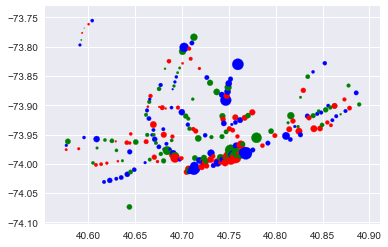

In [73]:
day_by_location = subway_df.groupby(['latitude', 'longitude'], as_index = False).mean()
scaled_entries = day_by_location['ENTRIESn_hourly'] / day_by_location['ENTRIESn_hourly'].std()
plt.scatter(day_by_location['latitude'], day_by_location['longitude'], s = scaled_entries * 25, c = ['red', 'blue', 'green'])